In [24]:
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [50]:
path = 'kddcup.data_10_percent_corrected'
kdd_data = pd.read_csv(path, header=None)

kdd_data[1], protocols = pd.factorize(kdd_data[1])
kdd_data[2], services = pd.factorize(kdd_data[2])
kdd_data[3], flags    = pd.factorize(kdd_data[3])
kdd_data[41], attacks = pd.factorize(kdd_data[41])
#kdd_data.head()

scaler = MinMaxScaler()
data_transformed= scaler.fit_transform(kdd_data)

c:\users\eric\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [52]:
error = []
labels = []
K = [2,3,4, 22,23,24,30]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    error.append(km.inertia_)
    labels.append(km.labels_)

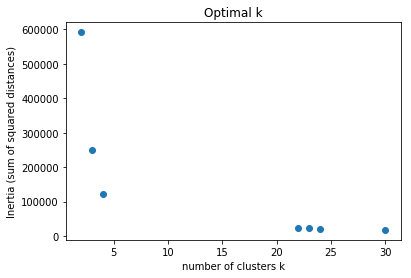

In [62]:
plt.plot(K, error, 'o')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Optimal k')
plt.show()

In [63]:
km.cluster_centers_.shape

(30, 42)

In [67]:
pca = PCA(n_components=3).fit(data_transformed)
pca_3d = pca.transform(data_transformed)

In [69]:
pca_3d

array([[ 0.68351646,  1.43335234, -0.42200799, ...,  0.01566232,
         0.00881599, -0.00356094],
       [ 0.6916106 ,  1.44310212, -0.42952296, ...,  0.01800234,
         0.00887729, -0.00323919],
       [ 0.68557812,  1.44303027, -0.43472774, ...,  0.01840725,
         0.00863091, -0.00305955],
       ...,
       [ 0.49110888,  1.46647421, -0.67096846, ...,  0.00684463,
        -0.03380988, -0.02962299],
       [ 0.42306181,  1.54515034, -0.62245292, ...,  0.00916613,
        -0.00263761, -0.00318886],
       [ 0.35270436,  1.52749947, -0.61363576, ...,  0.01692336,
         0.00827453,  0.00560602]])

In [ ]:
fig = plt.figure(figsize=(19.2, 14.4))
for index, label in enumerate(labels):
    ax = fig.add_subplot(3, 3, index+1, projection='3d')
    ax.scatter(pca_3d[:,0],pca_3d[:,1], pca_3d[:,2], c=label)
plt.show()

In [73]:
pca = PCA(n_components=3).fit(data_transformed)
pca_data_3d = pca.transform(data_transformed)

In [ ]:
error_pca = []
labels_pca = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_data_3d)
    error_pca.append(km.inertia_)
    labels_pca.append(km.labels_)

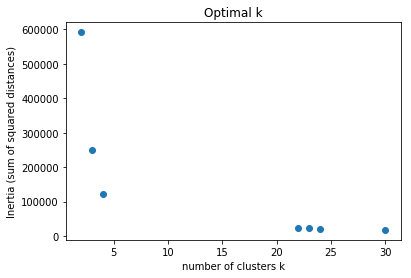

In [75]:
plt.plot(K, error, 'o')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Optimal k')
plt.show()